In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import arviz as az
import bambi as bmb
import hddm_wfpt
import jax
import pytensor

import hssm

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.


RuntimeError: jaxlib is version 0.4.21, but this version of jax requires version >= 0.4.34.

In [5]:
jaxlib.__version__

NameError: name 'jaxlib' is not defined

In [11]:
RNG = np.random.default_rng(seed=2025)
np.set_printoptions(suppress=True)

In [12]:
pytensor.config.floatX = "float32"
jax.config.update("jax_enable_x64", False)

In [13]:
true_params = {
    "v": 0.5,
    "a": 1.5,
    "z": 0.5,
    "t": 0.5
}

In [14]:
dataset = hssm.simulate_data(model="ddm", theta=true_params, size=1000)

In [15]:
dataset

,rt,response
0,1.704704,1.0
1,3.108258,1.0
2,1.838730,1.0
3,0.674545,1.0
4,1.271118,1.0
...,...,...
995,1.969554,1.0
996,3.676566,1.0
997,0.799636,1.0
998,2.761686,1.0


<Axes: xlabel='rt', ylabel='Count'>

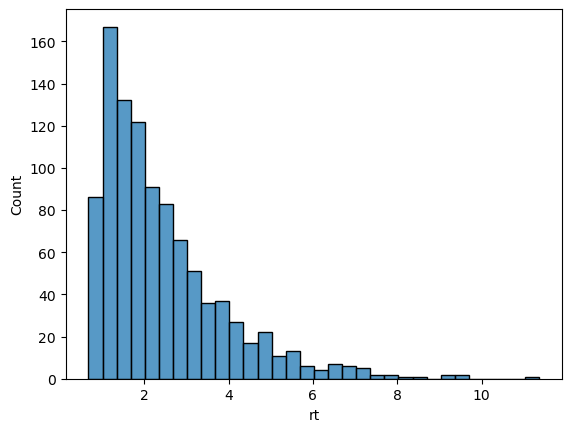

In [18]:
sns.histplot(dataset.rt)

In [21]:
simple_ddm = hssm.HSSM(data=dataset)

ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Le(0.0, 20.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\


You can find the C code in this temporary file: C:\Users\GERALD~1\AppData\Local\Temp\pytensor_compilation_error_r29r3c_j


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(-inf)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File


You can find the C code in this temporary file: C:\Users\GERALD~1\AppData\Local\Temp\pytensor_compilation_error_x7foo6aj


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(20.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File


You can find the C code in this temporary file: C:\Users\GERALD~1\AppData\Local\Temp\pytensor_compilation_error_0l7n6ens


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(-1.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File


You can find the C code in this temporary file: C:\Users\GERALD~1\AppData\Local\Temp\pytensor_compilation_error_l293psm7


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(0.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File 


You can find the C code in this temporary file: C:\Users\GERALD~1\AppData\Local\Temp\pytensor_compilation_error_cdzj166v


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Le(0.0, 20.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\


You can find the C code in this temporary file: C:\Users\GERALD~1\AppData\Local\Temp\pytensor_compilation_error_mauy268k


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(-inf)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File


You can find the C code in this temporary file: C:\Users\GERALD~1\AppData\Local\Temp\pytensor_compilation_error_c2jrz5xh


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(20.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File


You can find the C code in this temporary file: C:\Users\GERALD~1\AppData\Local\Temp\pytensor_compilation_error_7j9wyic7


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(-1.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File


You can find the C code in this temporary file: C:\Users\GERALD~1\AppData\Local\Temp\pytensor_compilation_error_1bdxu00b


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(0.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File 


You can find the C code in this temporary file: C:\Users\GERALD~1\AppData\Local\Temp\pytensor_compilation_error_xv4tfj6d


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Le(0.0, 20.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\


You can find the C code in this temporary file: C:\Users\GERALD~1\AppData\Local\Temp\pytensor_compilation_error_g9aia7fo


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(-inf)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File


You can find the C code in this temporary file: C:\Users\GERALD~1\AppData\Local\Temp\pytensor_compilation_error_ga_rhfol


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(20.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File


You can find the C code in this temporary file: C:\Users\GERALD~1\AppData\Local\Temp\pytensor_compilation_error_rma852ff


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(-1.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File


You can find the C code in this temporary file: C:\Users\GERALD~1\AppData\Local\Temp\pytensor_compilation_error_fdacw95u


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(0.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File 


You can find the C code in this temporary file: C:\Users\GERALD~1\AppData\Local\Temp\pytensor_compilation_error_b3bfwczy


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Le(0.0, 20.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\


You can find the C code in this temporary file: C:\Users\GERALD~1\AppData\Local\Temp\pytensor_compilation_error_ywcn4tm9


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(-inf)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File


You can find the C code in this temporary file: C:\Users\GERALD~1\AppData\Local\Temp\pytensor_compilation_error_fwf7q3w9


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(20.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File


You can find the C code in this temporary file: C:\Users\GERALD~1\AppData\Local\Temp\pytensor_compilation_error_3ynsfjr3


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(-1.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File


You can find the C code in this temporary file: C:\Users\GERALD~1\AppData\Local\Temp\pytensor_compilation_error_1xtgq4ma


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(0.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File 


You can find the C code in this temporary file: C:\Users\GERALD~1\AppData\Local\Temp\pytensor_compilation_error_i11e3avk


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(-inf)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File


You can find the C code in this temporary file: C:\Users\GERALD~1\AppData\Local\Temp\pytensor_compilation_error_up_1qrkh


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(20.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File


You can find the C code in this temporary file: C:\Users\GERALD~1\AppData\Local\Temp\pytensor_compilation_error_3d_2k6yq


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(-1.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File


You can find the C code in this temporary file: C:\Users\GERALD~1\AppData\Local\Temp\pytensor_compilation_error_k7i08r4z


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(0.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File 


You can find the C code in this temporary file: C:\Users\GERALD~1\AppData\Local\Temp\pytensor_compilation_error_ojy23fc5


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(-inf)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File


You can find the C code in this temporary file: C:\Users\GERALD~1\AppData\Local\Temp\pytensor_compilation_error_5v96daul


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(20.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File


You can find the C code in this temporary file: C:\Users\GERALD~1\AppData\Local\Temp\pytensor_compilation_error_esy_4u9w


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(-1.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File


You can find the C code in this temporary file: C:\Users\GERALD~1\AppData\Local\Temp\pytensor_compilation_error_ywp4t3a1


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(0.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File 


You can find the C code in this temporary file: C:\Users\GERALD~1\AppData\Local\Temp\pytensor_compilation_error_fflyypph


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(-inf)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File


You can find the C code in this temporary file: C:\Users\GERALD~1\AppData\Local\Temp\pytensor_compilation_error_zqlz3f1s


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(20.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\tensor\rewriting\basic.py", line 1173, in constant_folding
    return unconditional_constant_folding.transform(fgraph, node)
  File "c:\Users\Gerald Wong\.conda\envs\hssm-play\lib\site-packages\pytensor\graph\rewriting\basic.py", line 1086, in transform
    return self.fn(fgraph, node)
  File


You can find the C code in this temporary file: C:\Users\GERALD~1\AppData\Local\Temp\pytensor_compilation_error_9so39ih7


KeyboardInterrupt: 